In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_labels[0]


1

In [6]:
max([max(sequence) for sequence in train_data])


9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])



In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model =keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adagrad", loss="mean_squared_error", metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=35, batch_size=1024, validation_data=(x_val, y_val))


Epoch 1/35
15/15 [==============================] - 7s 380ms/step - loss: 0.2560 - accuracy: 0.4837 - val_loss: 0.2544 - val_accuracy: 0.4877
Epoch 2/35
15/15 [==============================] - 2s 125ms/step - loss: 0.2537 - accuracy: 0.4926 - val_loss: 0.2527 - val_accuracy: 0.4983
Epoch 3/35
15/15 [==============================] - 2s 122ms/step - loss: 0.2519 - accuracy: 0.5073 - val_loss: 0.2514 - val_accuracy: 0.5083
Epoch 4/35
15/15 [==============================] - 2s 132ms/step - loss: 0.2505 - accuracy: 0.5182 - val_loss: 0.2501 - val_accuracy: 0.5189
Epoch 5/35
15/15 [==============================] - 2s 124ms/step - loss: 0.2491 - accuracy: 0.5280 - val_loss: 0.2489 - val_accuracy: 0.5272
Epoch 6/35
15/15 [==============================] - 2s 131ms/step - loss: 0.2478 - accuracy: 0.5385 - val_loss: 0.2478 - val_accuracy: 0.5380
Epoch 7/35
15/15 [==============================] - 3s 182ms/step - loss: 0.2466 - accuracy: 0.5498 - val_loss: 0.2467 - val_accuracy: 0.5468
Epoch 

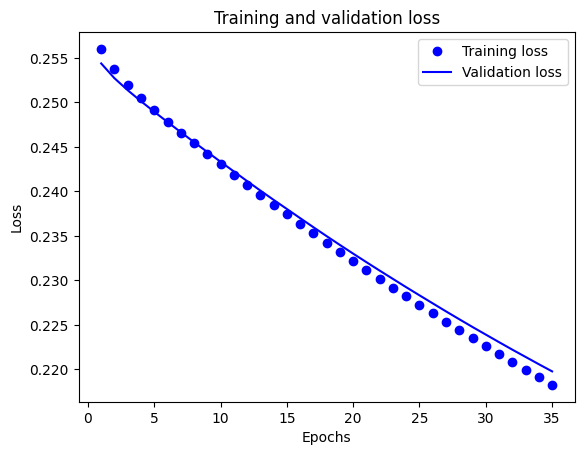

In [12]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

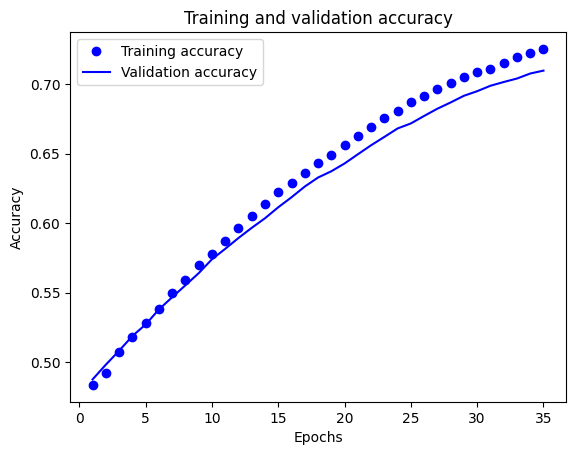

In [13]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [14]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2198 - accuracy: 0.7112


In [15]:
results

[0.2198193222284317, 0.7112399935722351]

Model with regularization

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

model1 = keras.Sequential([
    layers.Dense(64, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout with 50% rate
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model1.fit(partial_x_train, partial_y_train, epochs=35, batch_size=1024, validation_data=(x_val, y_val))

Epoch 1/35
15/15 [==============================] - 4s 197ms/step - loss: 0.6244 - accuracy: 0.7731 - val_loss: 0.4859 - val_accuracy: 0.8510
Epoch 2/35
15/15 [==============================] - 2s 133ms/step - loss: 0.4056 - accuracy: 0.8891 - val_loss: 0.4000 - val_accuracy: 0.8801
Epoch 3/35
15/15 [==============================] - 2s 143ms/step - loss: 0.3314 - accuracy: 0.9171 - val_loss: 0.3708 - val_accuracy: 0.8884
Epoch 4/35
15/15 [==============================] - 2s 133ms/step - loss: 0.2923 - accuracy: 0.9307 - val_loss: 0.3584 - val_accuracy: 0.8891
Epoch 5/35
15/15 [==============================] - 2s 150ms/step - loss: 0.2658 - accuracy: 0.9419 - val_loss: 0.3526 - val_accuracy: 0.8868
Epoch 6/35
15/15 [==============================] - 3s 189ms/step - loss: 0.2493 - accuracy: 0.9473 - val_loss: 0.3511 - val_accuracy: 0.8845
Epoch 7/35
15/15 [==============================] - 2s 133ms/step - loss: 0.2349 - accuracy: 0.9532 - val_loss: 0.3519 - val_accuracy: 0.8840
Epoch 

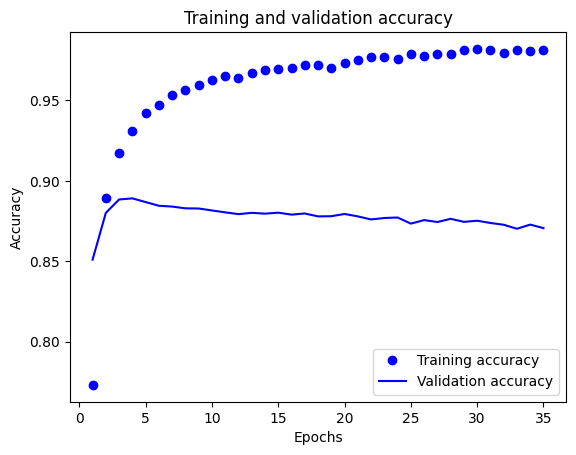

In [17]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 4ms/step - loss: 0.4432 - accuracy: 0.8616


[0.44323429465293884, 0.8615999817848206]

### The Summary of Analyzed Results

#### Data Preparation
The IMDB dataset is vectorized, meaning text reviews are converted to binary vectors to be used for processing through neural networks.

#### Initial Model
In the model built here, there was a simple neural network with one hidden layer that used the activation function Tanh and Adagrad optimizer. The model was trained for 35 epochs while tracking performance through plots of training and validation loss and accuracy.

#### Regularized Model
Enhancements were made using L2 regularization and a dropout layer to avoid overfitting. Adam was selected as the optimizer; for the loss function, binary cross-entropy was employed, which is more compatible with binary classification problems.

#### Insight and Interpretation
1. **Vectorization**: A process of converting text into a form that a neural network can handle.
2. **Regularization**: L2 regularization and dropout improved generalization and reduced overfitting.
3. **Optimizers and Loss Functions**: Better results were found for binary classification with the Adam optimizer and binary cross-entropy loss.

#### Discussion of Results
**Regularized Model**:
   - **Training/Validation Loss**: A steady validation loss would likely indicate better generalization.
   - **Training/Validation Accuracy**: The validation accuracy was improved and proved the robustness of the model.
   - **Effects of Regularization**: The L2 regularization, together with the dropout layers, tremendously helped in reducing overfitting.
   - **Optimizer and Loss Function**: Model performance was improved by adding Adam optimizer and binary cross-entropy loss.

#### Conclusion
Regularization techniques, as well as the choice of the optimizer and the loss function, are all essential elements to build a robust neural network. It brought an improvement in the regularized generalized model.